# Classifying movie reviews: a binary classification example

#### Design a neural network to perform two-class classification or binary classification , of reviews form IMDB movie reviews dataset, to determine wether the reviews are positive or negative. We will use the Python library Keras to perform the classification

## The IMDB Dataset

The IMDB dataset is a set of 50,000 highly polarized reviews from the Internet Movie Database. They are split into 25000
reviews each for training and testing. Each set contains equal number (50%) of positive and negative reviews.
The IMDB dataset comes packaged with Keras. It consists of reviews and their corresponding labels (0 for negative and 1
for positive review). The reviews are a sequence of words. They come preprocessed as sequence of integers, where each
integer stands for a specific word in the dictionary.
The IMDB datset can be loaded directly from Keras and will usually download about 80 MB on your machine.

## Import Packages

In [3]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Data

In [6]:
# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [7]:
# Check the first label
train_labels[0]

1

In [8]:
# Since we restricted ourselves to the top 10000 frequent words, no word index should exceed
# we'll verify this below

# Here is a list of maximum indexes in every review --- we search the maximum index in this
print(type([max(sequence) for sequence in train_data]))

# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [9]:
# Let's quickly decode a review

# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
## indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of se 
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [10]:
len(reverse_word_index)

88584

## Preparing the data

### Vectorize input data

We cannot feed list of integers into our deep neural network. We will need to convert them into tensors.

To prepare our data we will One-hot Encode our lists and turn them into vectors of 0's and 1's. This would blow up all of our
sequences into 10,000 dimensional vectors containing 1 at all indices corresponding to integers present in that sequence.
This vector will have the element 0 at all indices which are not present in integer sequence.

Simply put, the 10,000 dimensional vector corresponding to each review, will have

Every index corresponding to a word
Every index vith value 1, is a word which is present in the review and is denoted by its integer counterpart
Every index containing 0, is a word not present in the review

We will vectorize our data manually for maximum clarity. This will result in a tensors of shape (25000, 10000).

In [14]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Creates an all zero matrix of shape
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1 # Sets specific indices of results[i]
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [15]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
X_train.shape

(25000, 10000)

## Vectorize labels

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Model defination

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Compiling the model

In this step we will choose an optimizer, a loss function, and metrics to observe. We will go forward with

binary_crossentropy loss function, commonlu used for Binary Classification
rmsprop optimizer and
accuracy as a measure of performance

We can pass our choices for optimizer, loss function and metrics as strings to the compile function because rmsprop ,
binary_crossentropy and accuracy come packaged with Keras.

model.complie(
    optimizer='rmsprop', <br>
    loss = 'binary_crossentropy', <br>
    metrics = ['accuracy'] <br>
)

One could use a customized loss function or ortimizer by passing the custom class instance as argument to the loss ,
optimizer or mertics fields.

In this example, we will implement our default choices, but, we will do so by passing class instances. This is exactly how we
would do it, if we had customized parameters.

In [20]:
model.compile(
optimizer=optimizers.RMSprop(learning_rate=0.001),
loss = losses.binary_crossentropy,
metrics = [metrics.binary_accuracy]
)

## Setting up Validation

We will set aside a part of our training data for validation of the accuracy of the model as it trains. A validation set enables
us to monitor the progress of our model on previously unseen data as it goes throug epochs during training. <br>

Validation steps help us fine tune the training parameters of the model.fit function so as to avoid overfitting and under
fitting of data.

In [21]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training our model

Initially, we will train our models for 20 epochs in mini-batches of 512 samples. We will aslo pass our validation set to the
fit method.

In [22]:
history = model.fit(
    partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 4s 90ms/step - loss: 0.5744 - binary_accuracy: 0.7377 - val_loss: 0.4624 - val_binary_accuracy: 0.8329
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3720 - binary_accuracy: 0.8905 - val_loss: 0.3655 - val_binary_accuracy: 0.8579
Epoch 3/20
30/30 [==============================] - 2s 82ms/step - loss: 0.2602 - binary_accuracy: 0.9237 - val_loss: 0.3218 - val_binary_accuracy: 0.8731
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1995 - binary_accuracy: 0.9417 - val_loss: 0.2868 - val_binary_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1580 - binary_accuracy: 0.9530 - val_loss: 0.2832 - val_binary_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1282 - binary_accuracy: 0.9637 - val_loss: 0.2924 - val_binary_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - los

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

history_dict contains values of
<li> Training loss <br>
<li> Trainining Accuracy <br>
<li> Validation Loss <br>
<li> Validation Accuracy <br>

at the end of each epoch. <br>

Let's use Matplotlib to plot Training and validation losses and Traing and Validation Accuracy side by side.

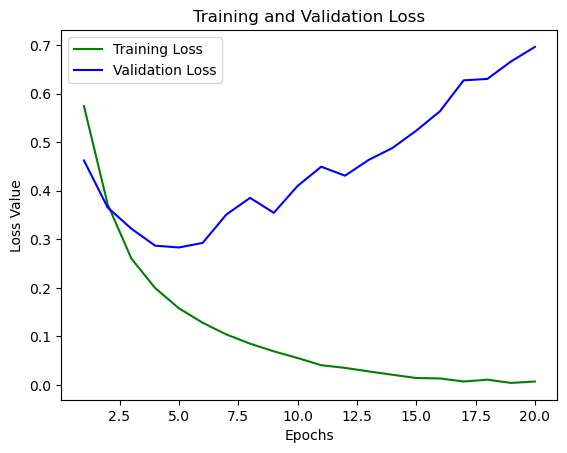

In [24]:
#Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

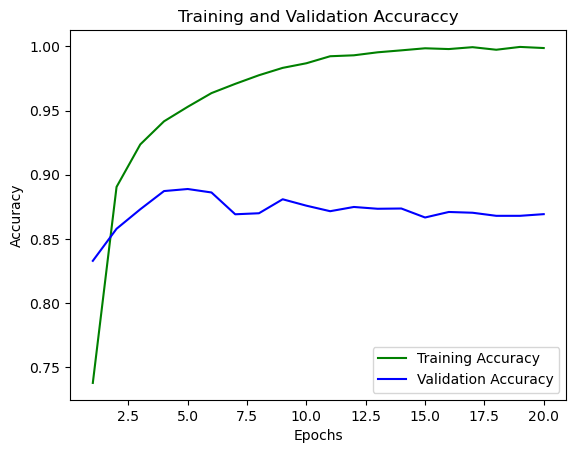

In [25]:
# Training and Validation Accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

We observe that minimum validation loss and maximum validation Accuracy is achived at around 3-5 epochs. After that we
observe 2 trends: <br>

<li> increase in validation loss and decrese in training loss <br>
<li> decrease in validation accuracy and increase in training accuracy <br>

This implies that the model is getting better at classifying the sentiment of the training data, but making consistently worse
predictions when it encounters new, previously unseed data. This is the hallmark of Overfitting. After the 5th epoch the
model begins to fit too closely to the trainning data. <br>

To address overfitting, we will reduce the number of epochs to somewhere between 3 and 5. These results may vary
depending on your machine and due to the very nature of the random assignment of weights that may vary from model to
mode. <br>

In our case we will stop training after 3 epochs.

## Retraining our Model

In [26]:
model.fit(
 partial_X_train,
 partial_y_train,
 epochs=3,
 batch_size=512,
 validation_data=(X_val, y_val)
)

Epoch 1/3
30/30 [==============================] - 4s 139ms/step - loss: 0.0024 - binary_accuracy: 0.9997 - val_loss: 0.7299 - val_binary_accuracy: 0.8675
Epoch 2/3
30/30 [==============================] - 1s 25ms/step - loss: 0.0034 - binary_accuracy: 0.9994 - val_loss: 0.7933 - val_binary_accuracy: 0.8658
Epoch 3/3
30/30 [==============================] - 1s 22ms/step - loss: 0.0014 - binary_accuracy: 0.9999 - val_loss: 0.7943 - val_binary_accuracy: 0.8651


## Model Evaluation

In [28]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)

782/782 [==============================] - 3s 3ms/step


In [29]:
result

array([[0.0068353 ],
       [1.        ],
       [0.99993306],
       ...,
       [0.00336606],
       [0.01363493],
       [0.575245  ]], dtype=float32)

In [32]:
y_pred = np.zeros(len(result))

for i, score in enumerate(result):
    y_pred[i] = np.round(score)

In [33]:
mae = metrics.mean_absolute_error(y_pred, y_test)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.14944>